# Supporting files
Methods for setting axes, saving, exporting to files

In [150]:
import matplotlib.pyplot as plt
from common import plotter
plt.style.use("my_official")

# Curvature at the flat regions
> `curvature.py`

Generates parameters for the curvature in different papers

In [ ]:
import curvature

In [2]:
zhu2010 = curvature.extract_curve_from_image(
        "data/zhu2010.png", [20, 100], [20, 100], [100, 250], [-0.01, 0.01], [2, 8]
    )

In [3]:
stern2014 = curvature.extract_curve_from_image(
        "data/stern2014.png", [230, 260], [0, 2], [0, 30], [-0.003, 0.003], [8.4, 9]
    )

In [4]:
gustavsson2012 = curvature.extract_curve_from_image(
        "data/gustavsson2012.png",
        [60, 140],
        [60, 120],
        [160, 180],
        [-0.005, 0.005],
        [2, 4],
    )

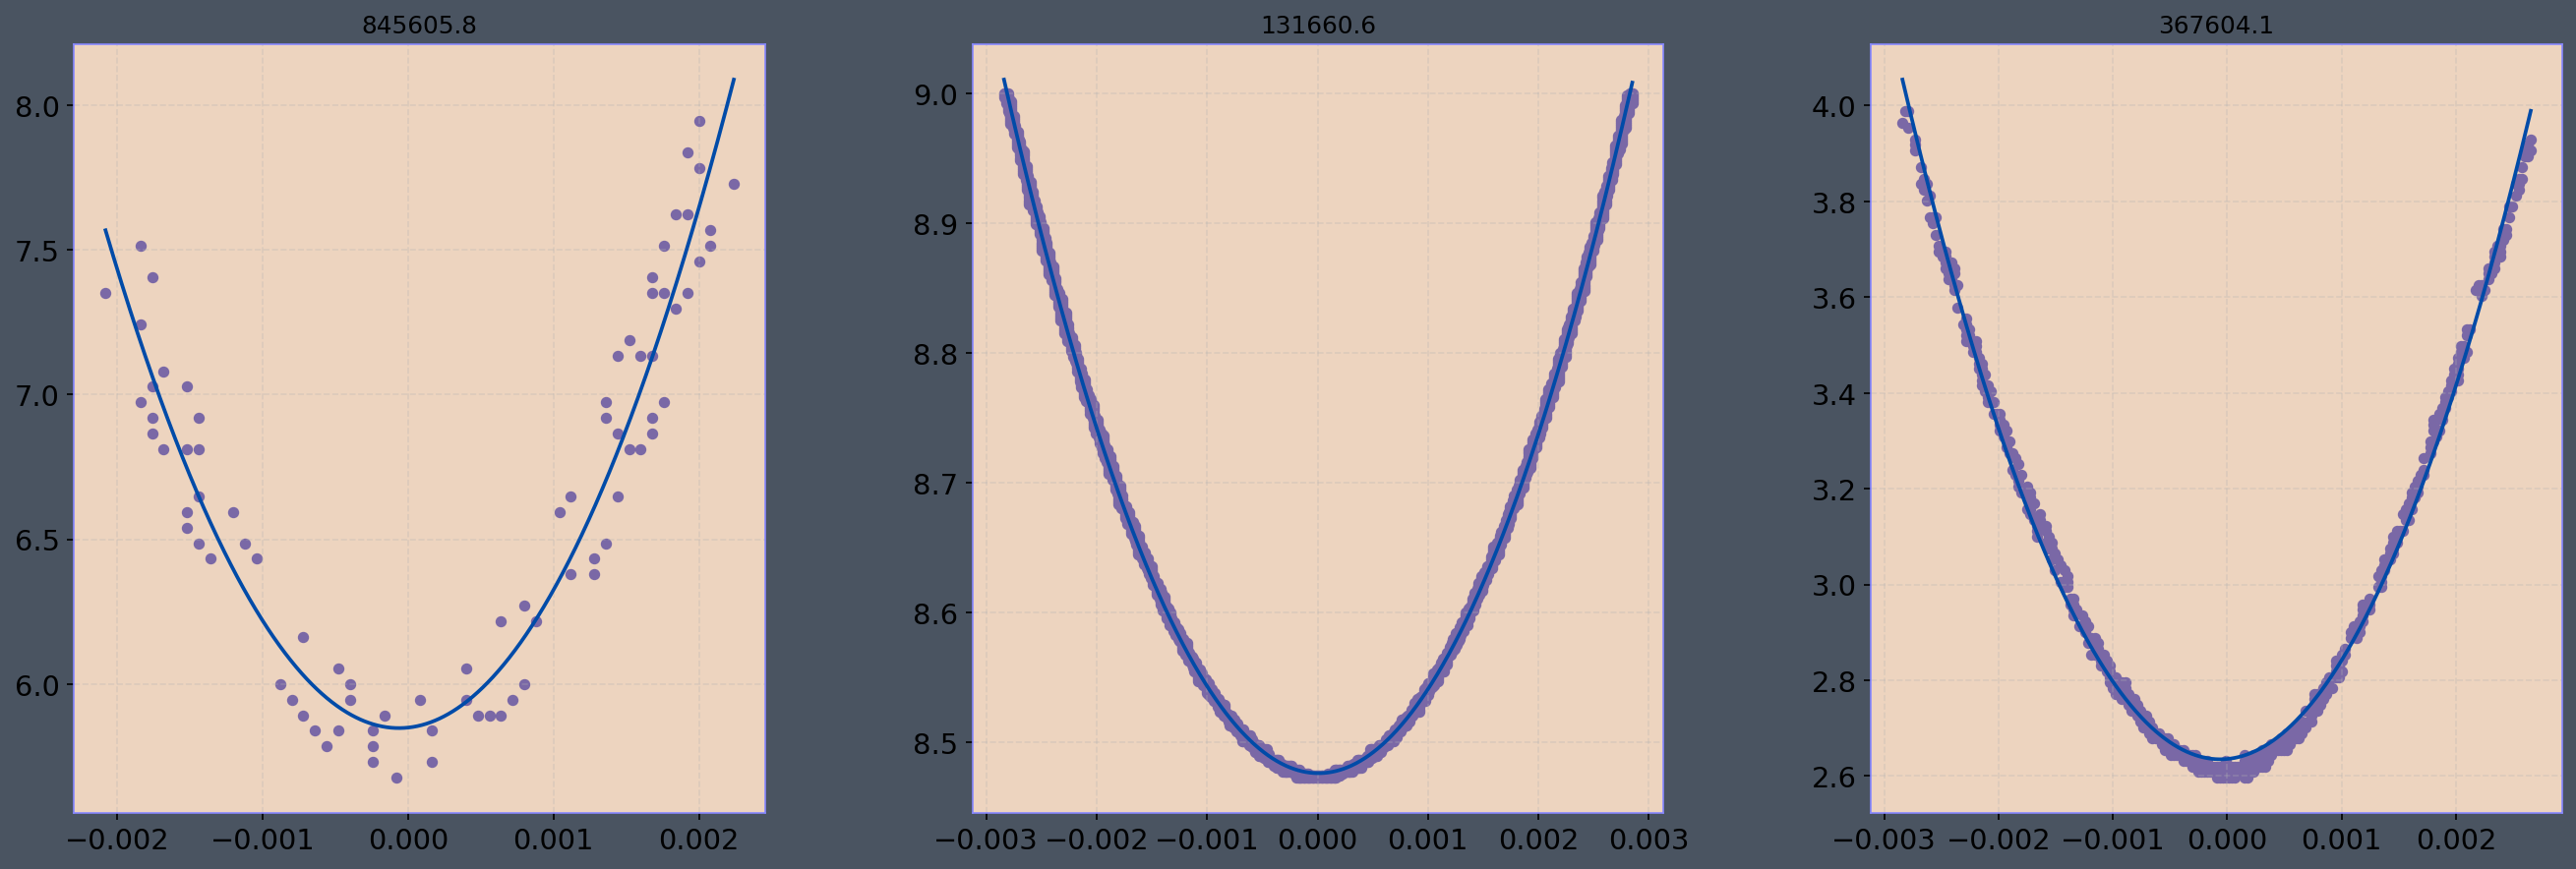

In [7]:
fig = plt.figure(figsize=(20, 7))
ax = fig.subplots(nrows=1, ncols=3)
curvature.fit_and_plot_parabolla(zhu2010, ax[0])
curvature.fit_and_plot_parabolla(stern2014, ax[1])
curvature.fit_and_plot_parabolla(gustavsson2012, ax[2])

# Rabi and Transmission plots
> `graph_analysis.py`

**Generates**
- `fig2_spectrum_dip.svg`: fit to the transmission dip
- `fig5_rabi.svg` oscillations

Gamma1   2.52596682673479
Gamma2:  4.983956296090957e-07
Omega:   6.2148193139220025
Offset:  10.045562154677716


<IPython.core.display.Javascript object>


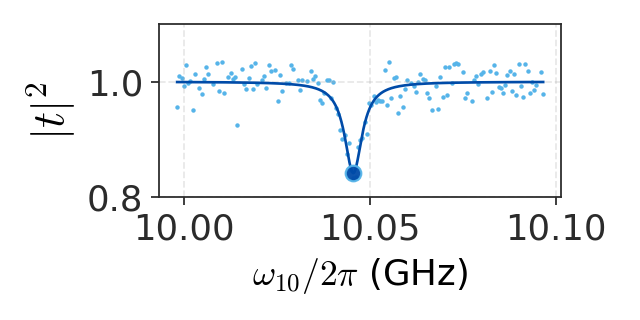

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")

from experimental_analysis.transmission_fitter import TransmissionFitter
from common import plotter

transmission_fitter = TransmissionFitter()

# 1 - load data and filter outliers
transmission_fitter.load_data("data/extinction_smith27.txt", 0, 1, convert_to_ghz=True)
transmission_fitter.filter(0.8, 10 ** 12, 0, 1.035)

# 2 - perform fitting
(gamma1, gamma2, omega, offset) = transmission_fitter.fit()

# 3 - visualise the fit
x_array_to_plot = np.linspace(min(transmission_fitter.transmission_x),
                      max(transmission_fitter.transmission_x), 500)
y_array_to_plot = transmission_fitter.fit_function(x_array_to_plot,
                                                gamma1, gamma2, omega, offset)
dip_index = np.argmin(y_array_to_plot)
x_dip = x_array_to_plot[dip_index]
y_dip = y_array_to_plot[dip_index]

# 3 - plot
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.scatter(transmission_fitter.transmission_x, transmission_fitter.transmission_y, marker=".", color="C2")
ax.plot(x_array_to_plot, y_array_to_plot, color="C9")
ax.plot(x_dip, y_dip,
               marker="o", color="#004BA8", markeredgecolor="C2",
               markersize=7, alpha=0.95,linestyle="")
ax.set_xlabel("$\omega_{10}/ 2 \pi$ (GHz)", fontsize=16)
ax.set_ylabel("$|t|^2$", fontsize=20)
ax.set_ylim([0.8, 1.1])
ax.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum_dip", "svg")

# Fitting the spectrum
Generates:
- `fitting_spectrum.svg`
- `fitting_spectrum_zoomed.svg`

In [2]:
%matplotlib notebook
import logging
import numpy as np
from quantum_builder import QuantumBuilder

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 7,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(-3, 3, 1000)
EC = 13.5
EJ = 92

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN, other_parameters = "test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
twin_qubit.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:16


> Plot along with experimental results

<IPython.core.display.Javascript object>


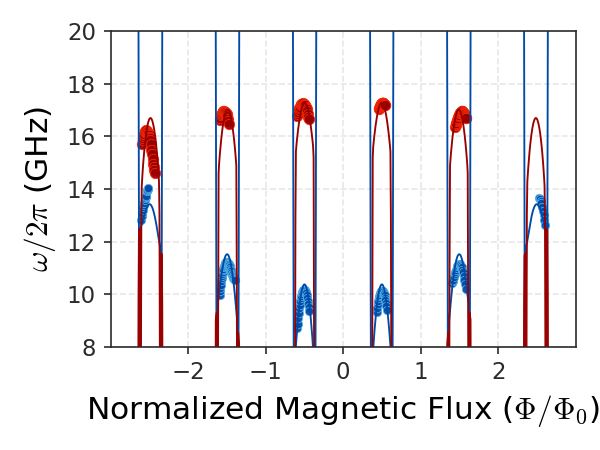

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")

from experimental_analysis.two_tone_data import TwoToneData
from common import plotter

two_tone_data = TwoToneData()
# 1 - load the experminetal data
two_tone_data.load_data(base_file_name="data/Qubit15_5JJ_Q2", 
                       offset=0.125,
                       period=0.7)

# 2 - plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(two_tone_data["flux_12"], two_tone_data["spectrum_12"],
        marker="o", color="#004BA8", markeredgecolor="C2", markeredgewidth="0.4", markersize=4, alpha=0.95, 
        linestyle="")
ax.plot(two_tone_data["flux_23"], two_tone_data["spectrum_23"],
        marker="o", color="C4", markeredgecolor="#fb2c07", markeredgewidth="0.4", markersize=5, alpha=0.95,
        linestyle="")

ax.plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
ax.plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
ax.set_xlim([-3, 3])
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_ylim([8, 20])
ax.set_xlabel("Normalized Magnetic Flux ($\Phi/\Phi_0$)", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)    
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum", "svg")

> Zoomed in

<IPython.core.display.Javascript object>


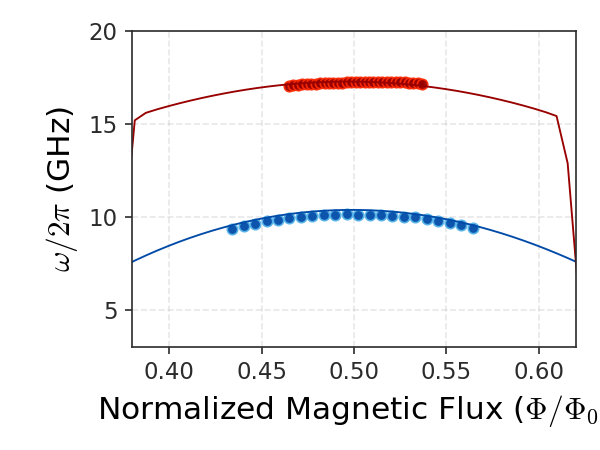

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(two_tone_data["flux_12"], two_tone_data["spectrum_12"],
        marker="o", color="#004BA8", markeredgecolor="C2", markeredgewidth="0.8", markersize=5, alpha=0.95, 
        linestyle="")
ax.plot(two_tone_data["flux_23"], two_tone_data["spectrum_23"],
        marker="o", color="C4", markeredgecolor="#fb2c07", markeredgewidth="0.8", markersize=5, alpha=0.95,
        linestyle="")

ax.plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
ax.plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
ax.set_xlim([0.38, 1 - 0.38])
ax.set_ylim([3, 20])
ax.set_xlabel("Normalized Magnetic Flux ($\Phi/\Phi_0$)", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum_zoomed", "svg")

# Plot of analytical spectrum and matrix elements

In [2]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("my_official")

from quantum_builder import QuantumBuilder


QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 3,
}
FLUX_NUMBER = np.linspace(0.3, 0.7, 500)
EC = 13.5
EJ = 91

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN, other_parameters = "test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
twin_qubit.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


## Plot the sparse matrix to make sure we build correctly

<IPython.core.display.Javascript object>


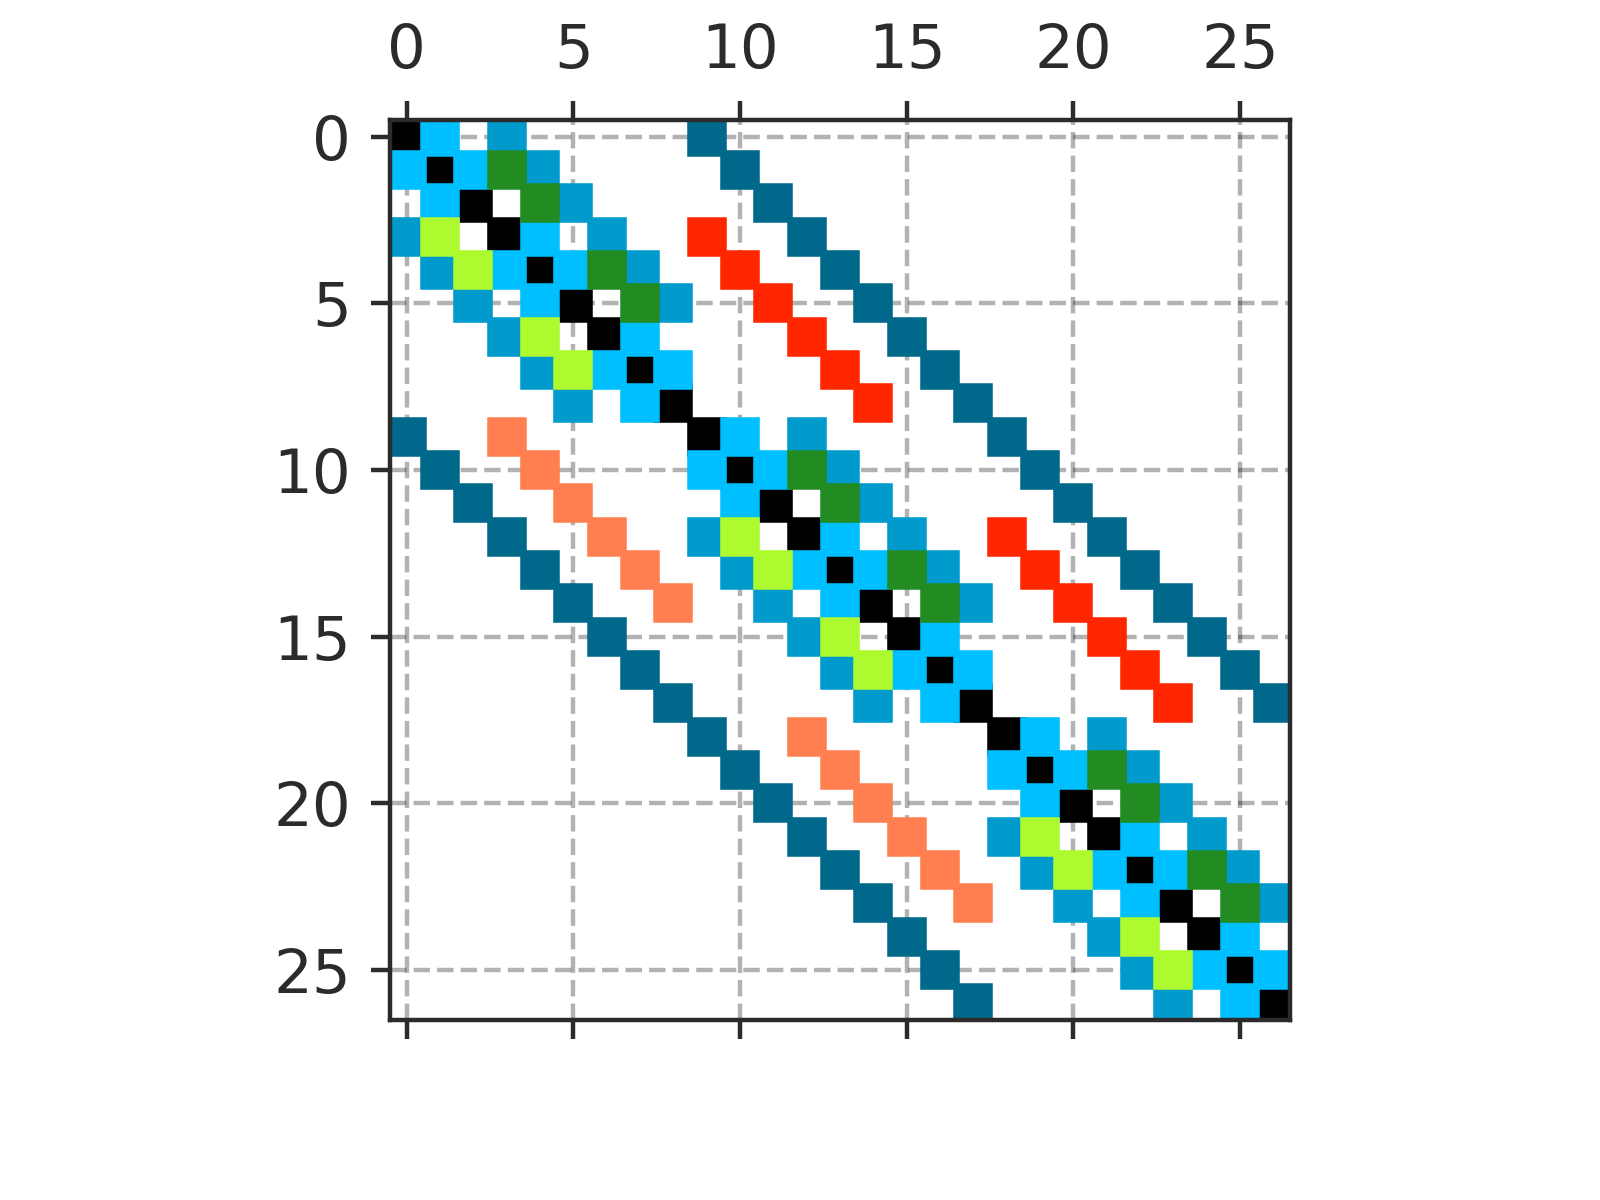

In [5]:
if QUBIT_PARAMETERS["states_per_island"] < 7:
    fig = plt.figure(figsize=(4, 3))
    ax = fig.subplots(nrows=1, ncols=1)
    twin_qubit.plot_sparse_matrix(ax)
    plt.savefig(f"./output/matrix_visualisation.svg", transparent=True)
else:
    logging.info("Skipping plotting matrix as it is very large")

## Plot of the analytical spectrum

<IPython.core.display.Javascript object>


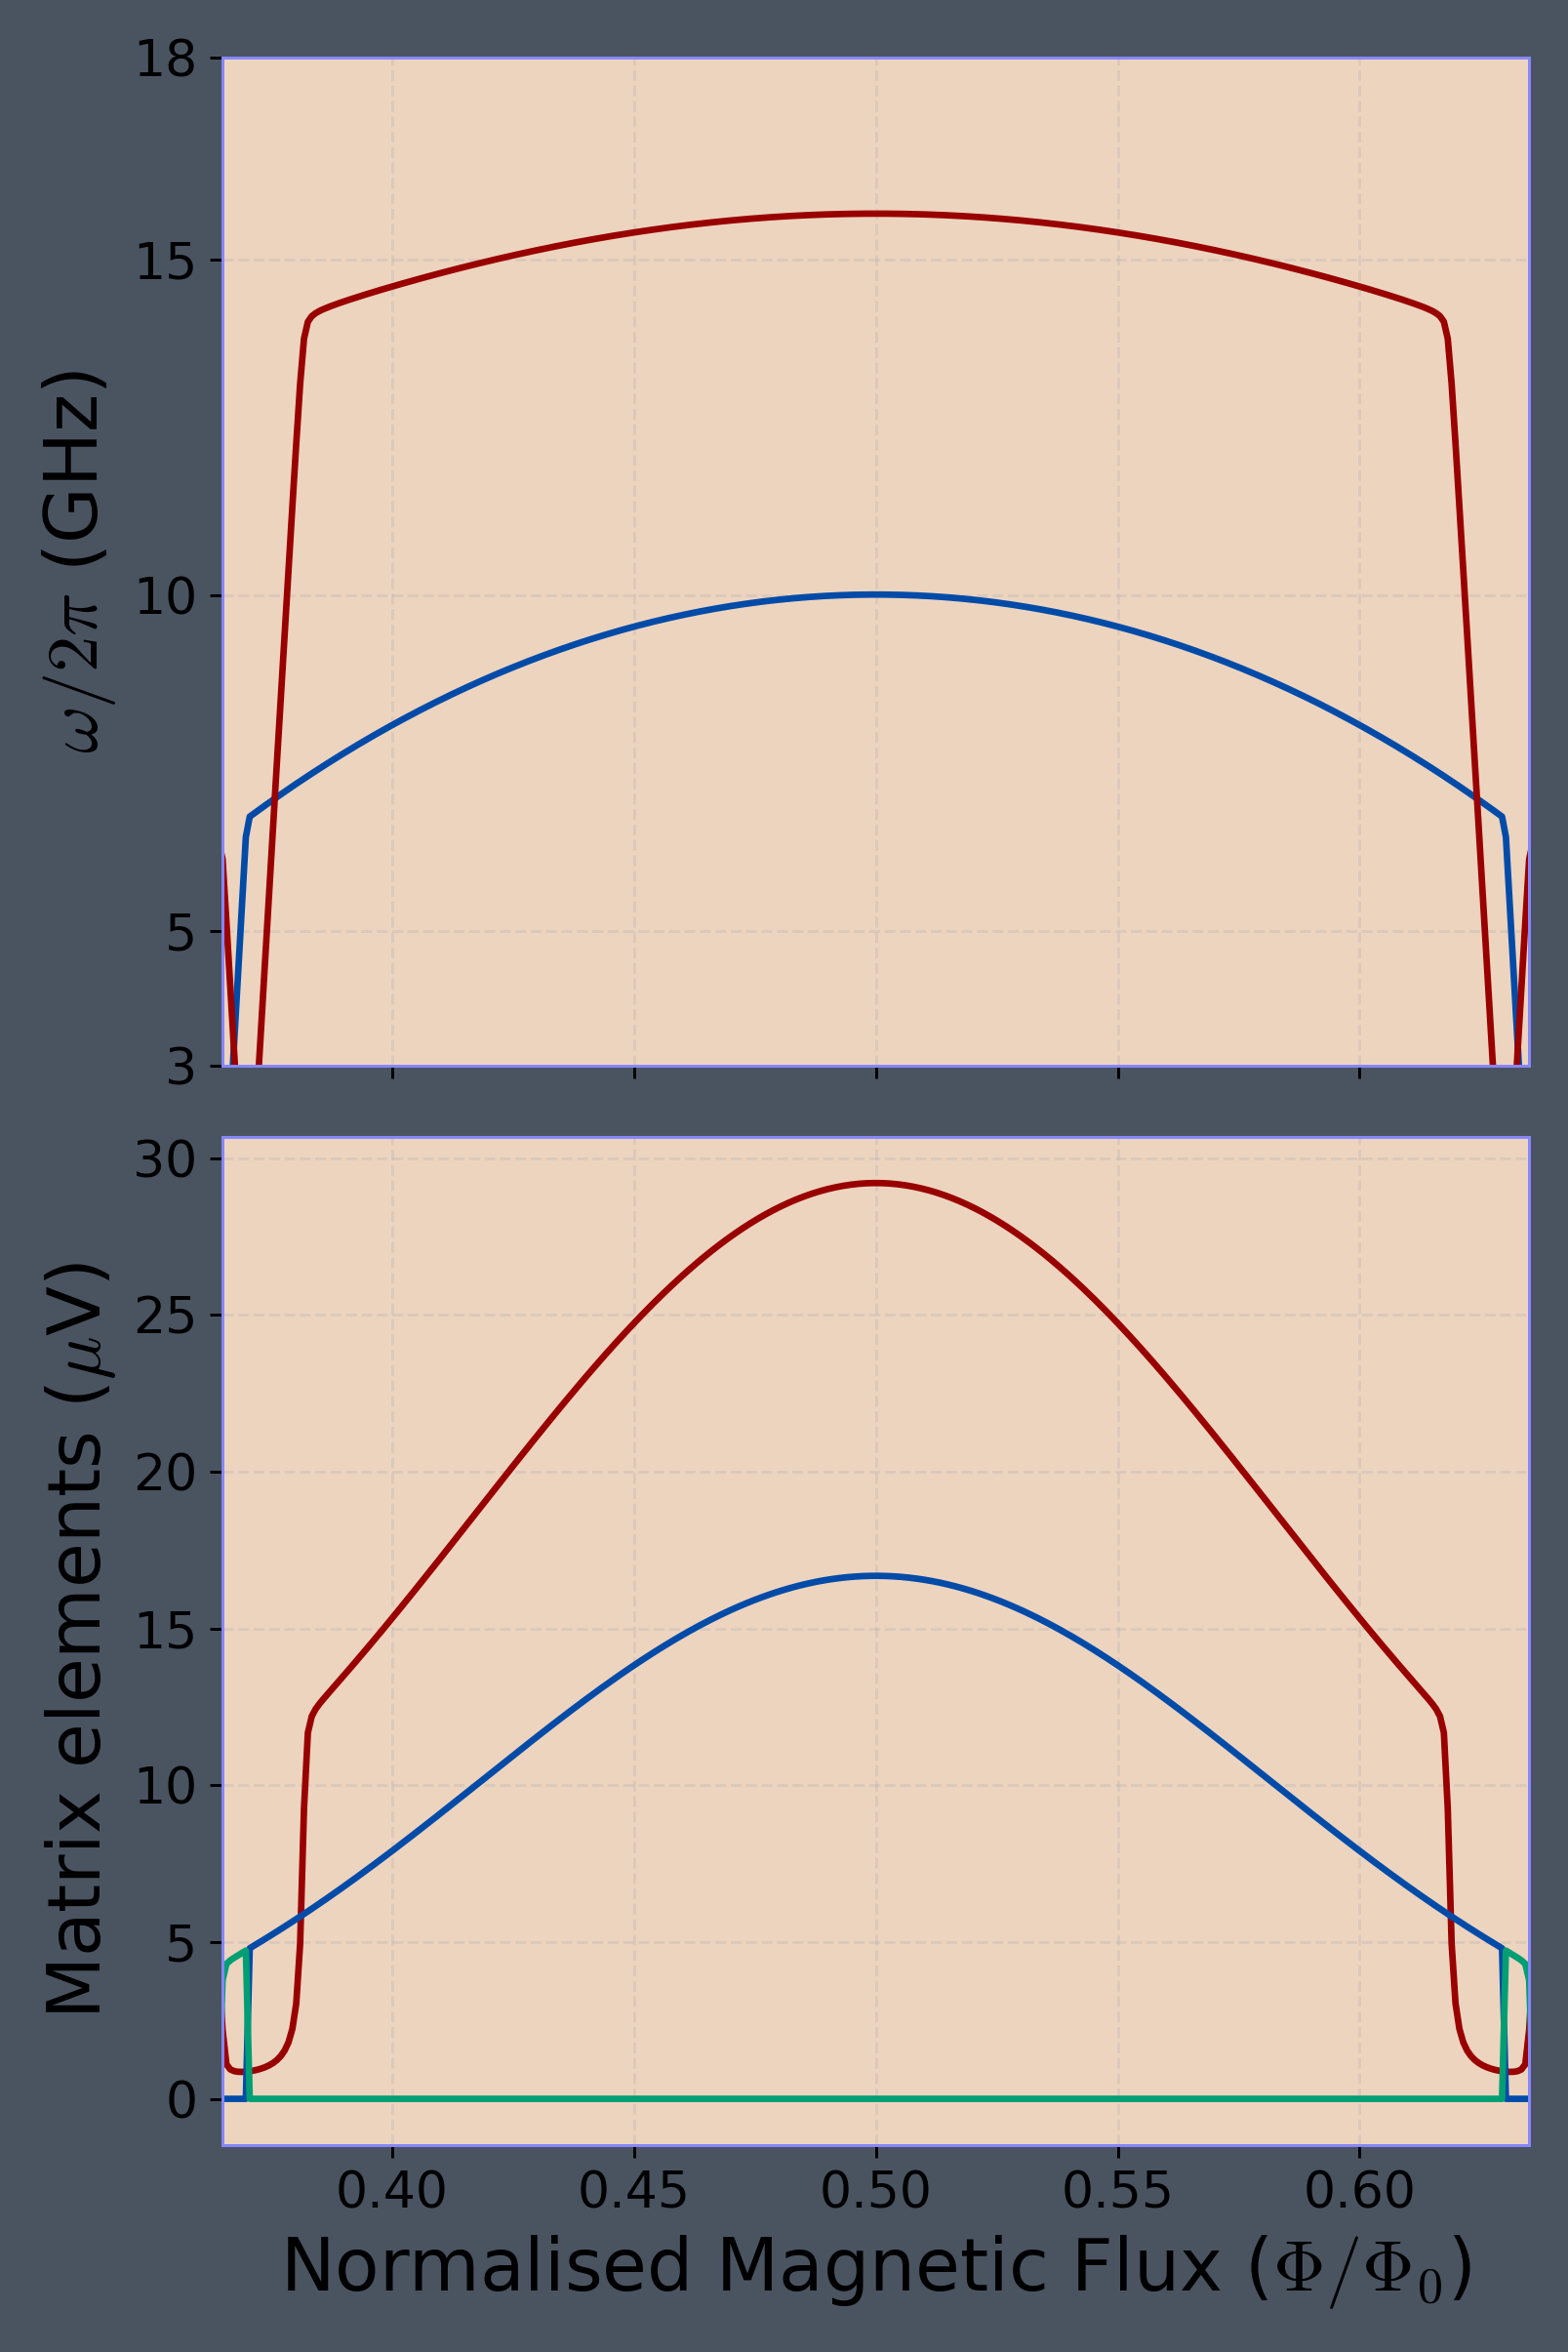

In [2]:
fig = plt.figure(figsize=(6, 9))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0")
ax[0].plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4")
ax[0].set_ylabel("$\omega/2\pi$ (GHz)")
ax[0].set_ylim([3, 18])
ax[0].set_yticks([3, 5, 10, 15, 18])

ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]) * 10**6, color='C4')
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]) * 10**6, color="C0")
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]) * 10**6, color="C6")
ax[1].set_xlabel("Normalised Magnetic Flux ($\Phi/\Phi_0$)")
ax[1].set_ylabel(r"Matrix elements ($\mu$V)")
ax[1].set_xlim([0.365, 0.635])

plt.tight_layout()
plt.show()

## Add the assymetric results

In [24]:
QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 2,
    "states_per_island": 9,
}
twin_qubit_ass = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARNING
)
twin_qubit_ass.override_parameters(EC=EC, EJ=EJ)
twin_qubit_ass.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:11


<IPython.core.display.Javascript object>


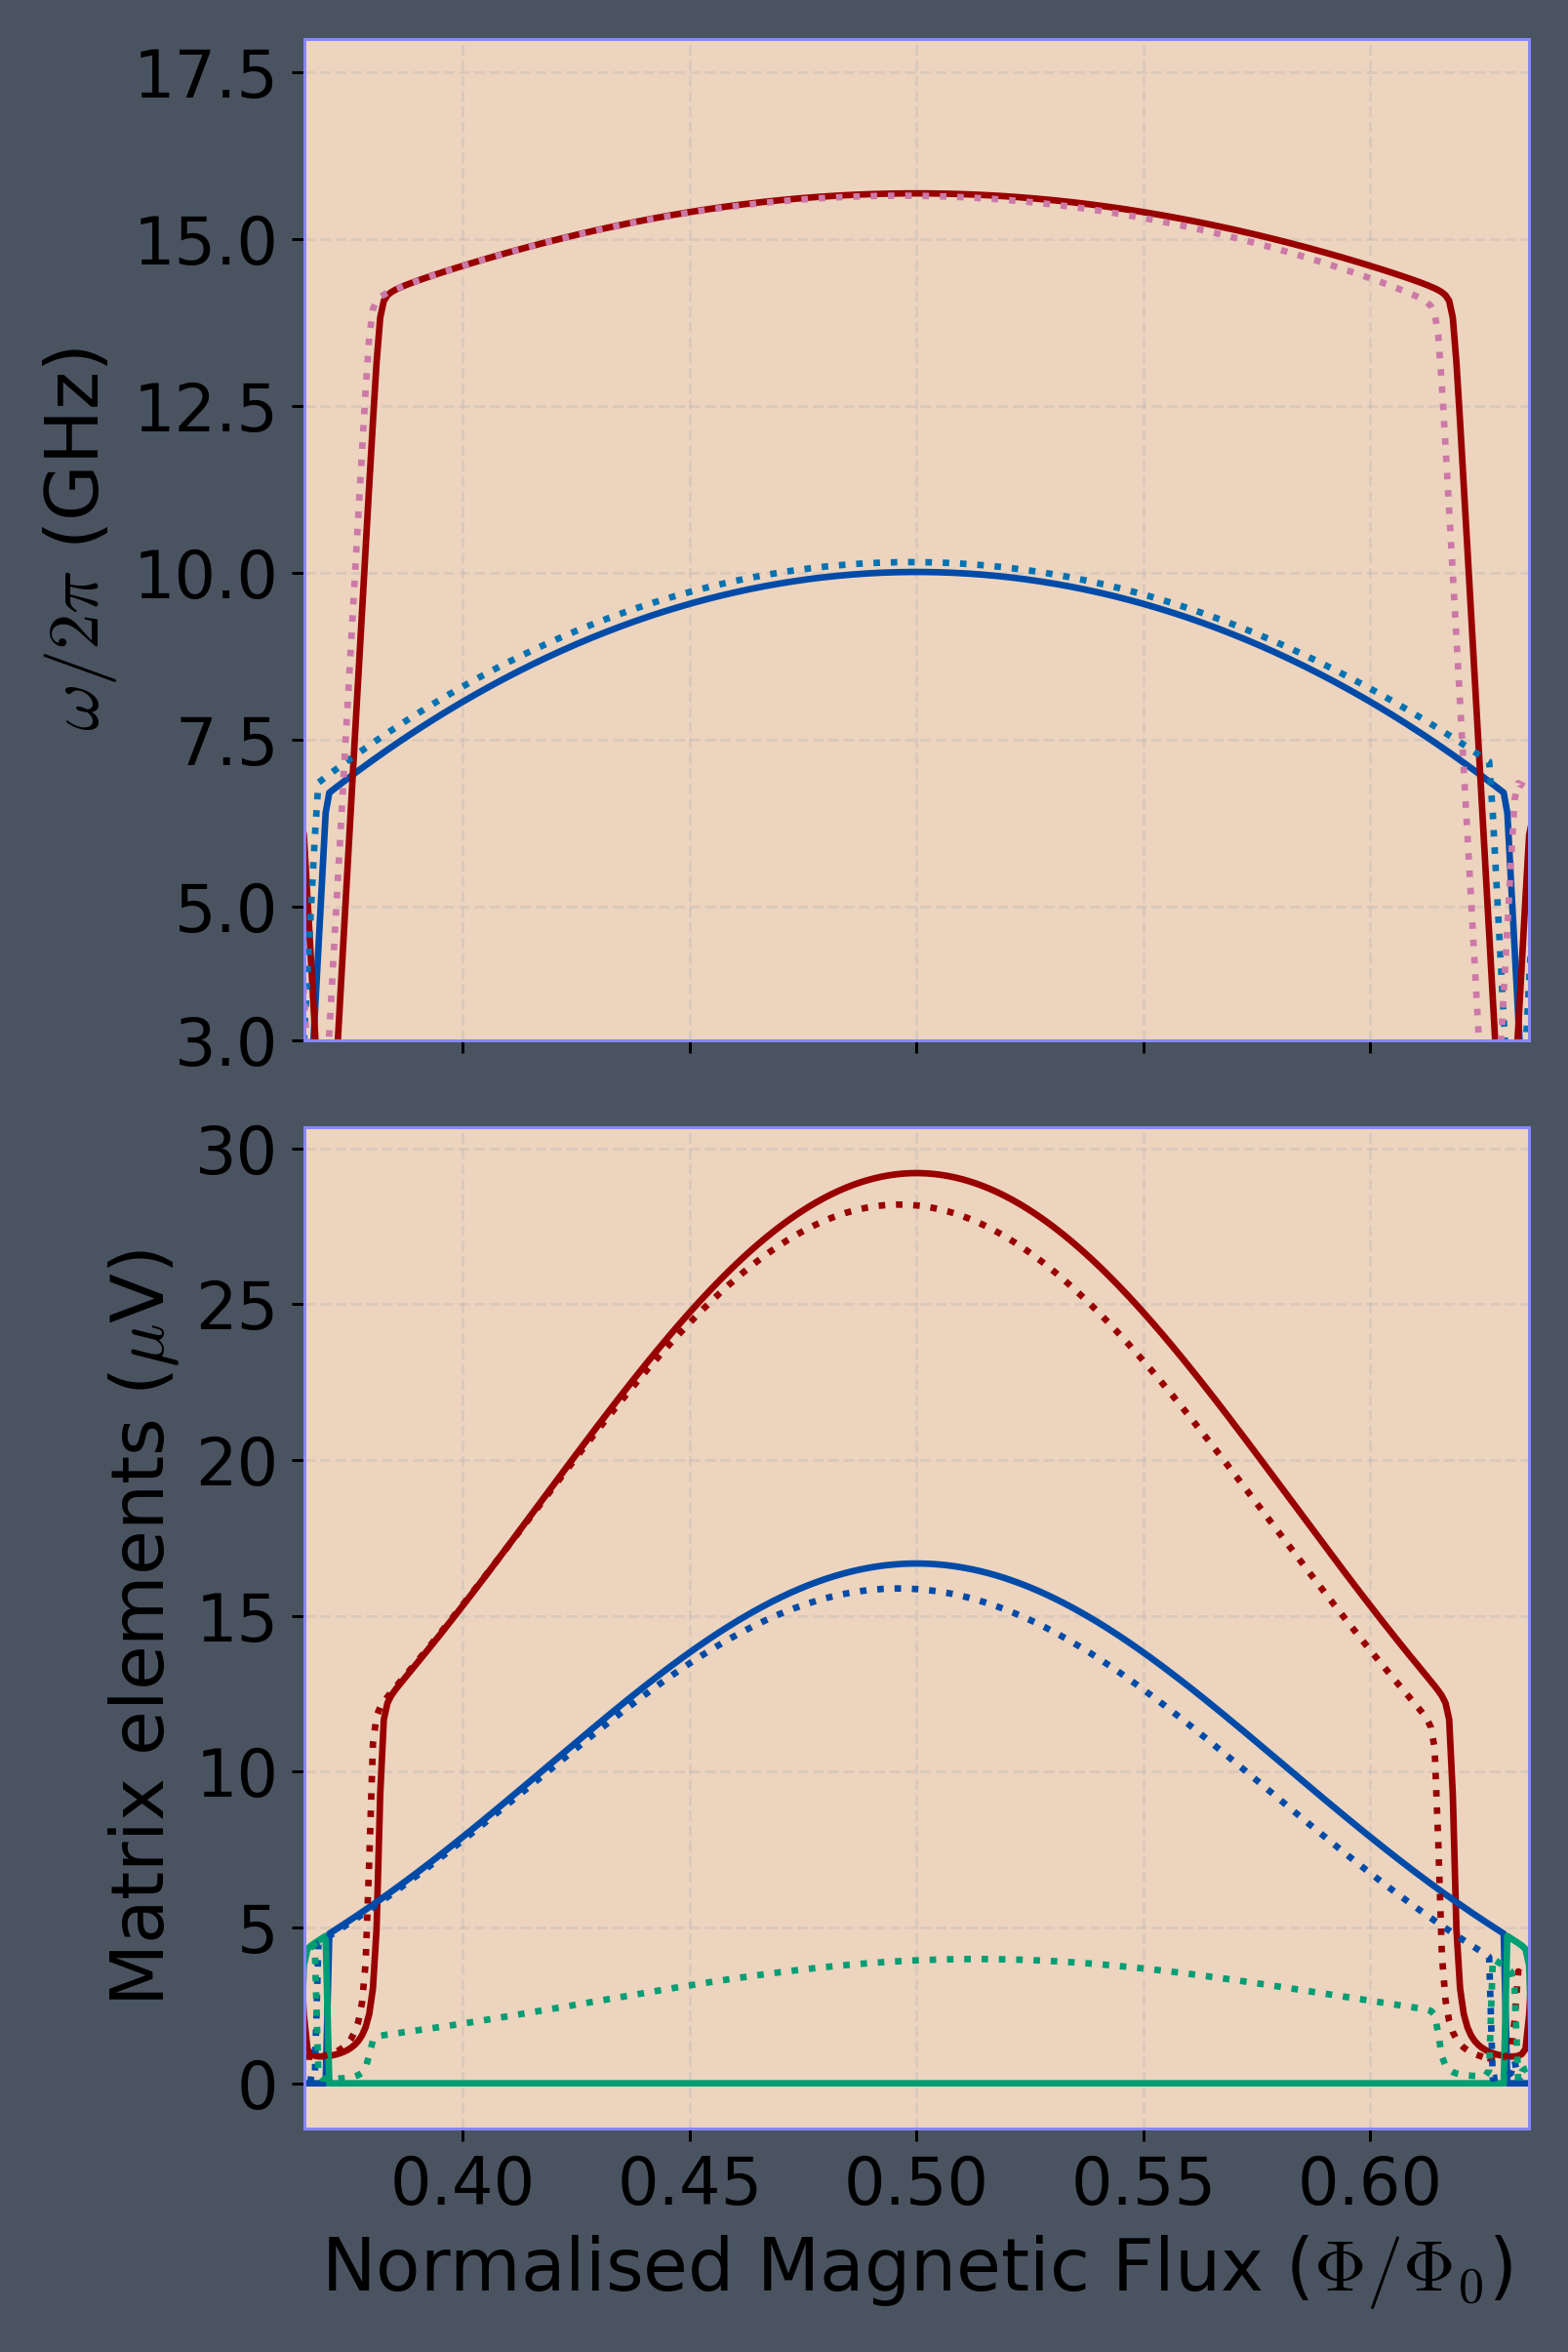

In [32]:
fig_ass = plt.figure(figsize=(6, 9))
ax_ass = fig_ass.subplots(nrows=2, ncols=1, sharex=True)

ax_ass[0].tick_params(labelsize=18)
ax_ass[1].tick_params(labelsize=18)


ax_ass[0].plot(twin_qubit.flux_list, twin_qubit.simulations["1-2"], color="C0")
ax_ass[0].plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4")
ax_ass[0].set_ylabel("$\omega/2\pi$ (GHz)")
ax_ass[0].set_ylim([3, 18])
ax_ass[0].set_yticks([3, 5, 7.5, 10, 12.5, 15, 17.5])

ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]) * 10**6, color='C4')
ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]) * 10**6, color="C0")
ax_ass[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]) * 10**6, color="C6")
ax_ass[1].set_xlabel("Normalised Magnetic Flux ($\Phi/\Phi_0$)")
ax_ass[1].set_ylabel(r"Matrix elements ($\mu$V)")
ax_ass[1].set_xlim([0.365, 0.635])

ax_ass[0].plot(twin_qubit_ass.flux_list, twin_qubit_ass.simulations["1-2"], color="C1", linestyle=":")
ax_ass[0].plot(twin_qubit_ass.flux_list, twin_qubit_ass.simulations["2-3"], color="C5", linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d32"]) * 10**6, color='C4', linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d21"]) * 10**6, color="C0", linestyle=":")
ax_ass[1].plot(twin_qubit_ass.flux_list, np.array(twin_qubit_ass.simulations["d13"]) * 10**6, color="C6", linestyle=":")

plt.tight_layout()
plt.show()

In [33]:
plt.savefig(f"./output/fig3.svg", transparent=True)

# Simulation in rotated coordinates
Save as the above block, except this time it is plotted in $\omega_{21}$ over $\varphi_r-\varphi_l$ coordinates

In [18]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

import matplotlib.pyplot as plt
plt.style.use("my_official")
from matplotlib import cm
import matplotlib as mpl

from quantum_builder import QuantumBuilder

EC = 13.5
EJ = 91
ALPHA = 1
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 3,
}
FLUX_NUMBER = np.linspace(0.3, 0.7, 500) # not used

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARNING, other_parameters="test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

twin_qubit.twin_qubit_hamiltonian_manager.stage2_prepare_constant_hamiltonian()
(voltage_matrix, phi_matrix) = twin_qubit.twin_qubit_operator_builder.build()

twin_qubit.twin_qubit_hamiltonian_manager.stage3_build_hamiltonian_for_simulation(
    phi_external=0, phi_external_assymetric=0 * 2 * pi)
# simulation_dictionary_phiplus_phiminus = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
#     phi_l_list=np.array([0.2]) * 2 * pi, 
#     phi_r_list=np.array([0]) * 2 * pi, 
#     number_of_levels_to_simulate=5, 
#     phil_phir_coordinates_supplied=False, 
#     use_sparse_matrix=False
# )

In [31]:
twin_qubit.twin_qubit_hamiltonian_manager.hamiltonian_simulation.todense()[22, 22]

(8.4375+0j)

In [1]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

import matplotlib.pyplot as plt
plt.style.use("my_official")
from matplotlib import cm
import matplotlib as mpl

from quantum_builder import QuantumBuilder

In [2]:
def index_of_first_element_greater_than_value(list_to_search, value):
    idx = next(idx for (idx, val) in enumerate(
        list_to_search) if val > value)
    return idx

## Prepare parameters

In [3]:
ALPHA = 1
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(0.3, 0.7, 500) # not used
EC = 13.5
EJ = 91
LOWER = 0
UPPER = 1
MIDPOINT = (UPPER - LOWER) / 2

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.INFO, other_parameters="test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

twin_qubit_state_manager:22:verify_simulation_parameters
⮑  ⚙ Quantum state manager is using:
7     states per island
343   total states


twin_qubit_hamiltonian_manager:161:print_skeleton_information
⮑  🏗 Skeleton Hamiltonian Information
charge              row  343    col  343    elm  343    
phi1                row  588    col  588    elm  588    
phi2                row  588    col  588    elm  588    
phi3                row  588    col  588    elm  588    
+phi1-phi2+phiExt   row  252    col  252    elm  252    
-phi1+phi2-phiExt   row  252    col  252    elm  252    
-phi2+phi3-nphiExt  row  252    col  252    elm  252    
+phi2-phi3+nphiExt  row  252    col  252    elm  252    


twin_qubit_constant_manager:150:print_constants
⮑  ⚛ Constant Manager using parameters:
EC:                           13.5
EJ:                           91
alpha:                        1
assymetry:                    1
jj_critical_current:          1.091035858683565e-07
jj_resistance:                2

## Run simulation

In [5]:
phi_external = np.linspace(LOWER * 2 * pi, UPPER * 2 * pi, 20)
simulation_dictionary_phil_phir = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_external, phi_external, 4, phil_phir_coordinates_supplied=False)

twin_qubit_hamiltonian_manager:190:stage2_prepare_constant_hamiltonian
⮑  🏗 Scaling constant parts of Hamiltonian with
EC:       13.5
EJ:       91
alpha:    1

twin_qubit_hamiltonian_manager:235:stage2_prepare_constant_hamiltonian
⮑  🏗 Constructed matrix 'hamiltonian_constant' with
elements: 4617 (rest will be evaluated during stage3)
rows:     6921
cols:     6921


twin_qubit_simulator_phil_phir:69:simulate
⮑  💻 Running simulation

/Users/CCCP/creamy_seas/monday_starts_on_saturday/qubit_simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvals"][phi_l_idx][phi_r_idx] = eigvals
/Users/CCCP/creamy_seas/monday_starts_on_saturday/qubit_simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvecs"][phi_l_idx][phi_r_idx][idx] = vec
twin_qub

## Run simulations in the rotated coordinates
- $\varphi_-$ is fed in in place of $\varphi_l$
- $\varphi_+$ is fed in in place of $\varphi_r$

Inside the function, we convert:
- $\varphi_l = \varphi_- + \varphi_+$
- $\varphi_r = \varphi_- - \varphi_+$

In [12]:
phi_degeneracy = (
    2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA),
    2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)
)
phi_minus_list = np.linspace(
    - 0.15 * (2 * pi),
    #2 * pi * (LOWER - MIDPOINT) / 2,
    0.15 * (2 * pi),
    #2 * pi * (UPPER - MIDPOINT) / 2, 
    100)
phi_plus_list = np.linspace(phi_degeneracy[0],
                       phi_degeneracy[1], 100)

simulation_dictionary_phiplus_phiminus = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_minus_list, phi_plus_list, 4, phil_phir_coordinates_supplied=True)

twin_qubit_hamiltonian_manager:190:stage2_prepare_constant_hamiltonian
⮑  🏗 Scaling constant parts of Hamiltonian with
EC:       13.5
EJ:       91
alpha:    1

twin_qubit_hamiltonian_manager:235:stage2_prepare_constant_hamiltonian
⮑  🏗 Constructed matrix 'hamiltonian_constant' with
elements: 4617 (rest will be evaluated during stage3)
rows:     6921
cols:     6921


twin_qubit_simulator_phil_phir:69:simulate
⮑  💻 Running simulation

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:05:11
twin_qubit_simulator_phil_phir:104:simulate
⮑  💻 Simulation completed



### Proove a point - the outermost dimension runs along $\varphi_+$

<IPython.core.display.Javascript object>


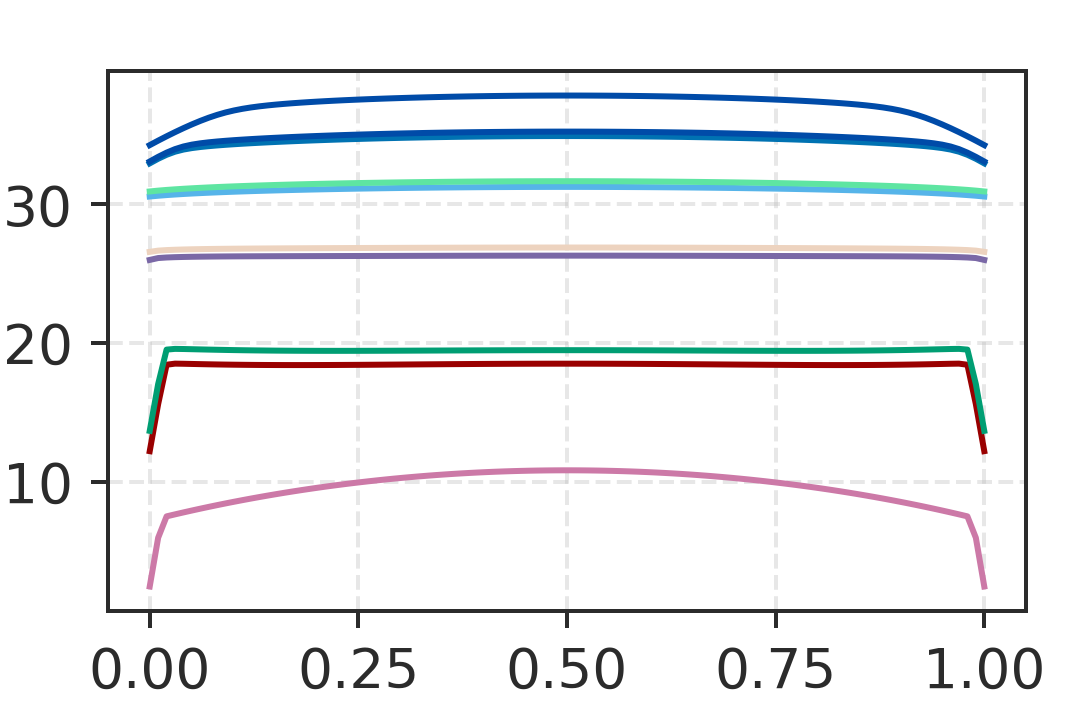

In [13]:
#surface_to_print = simulation_dictionary["1-2"][:,:,0]
surface_to_print = simulation_dictionary_phiplus_phiminus["eigvals"][:,
                                                    :, 1] - simulation_dictionary_phiplus_phiminus["eigvals"][:, :, 0]
i = 0
while i < len(surface_to_print[0]):
    plt.plot(np.linspace(0, 1, len(surface_to_print[i])), surface_to_print[i])
    i += 10
plt.show()

## Transition 01 plots

### 3D plots

<IPython.core.display.Javascript object>


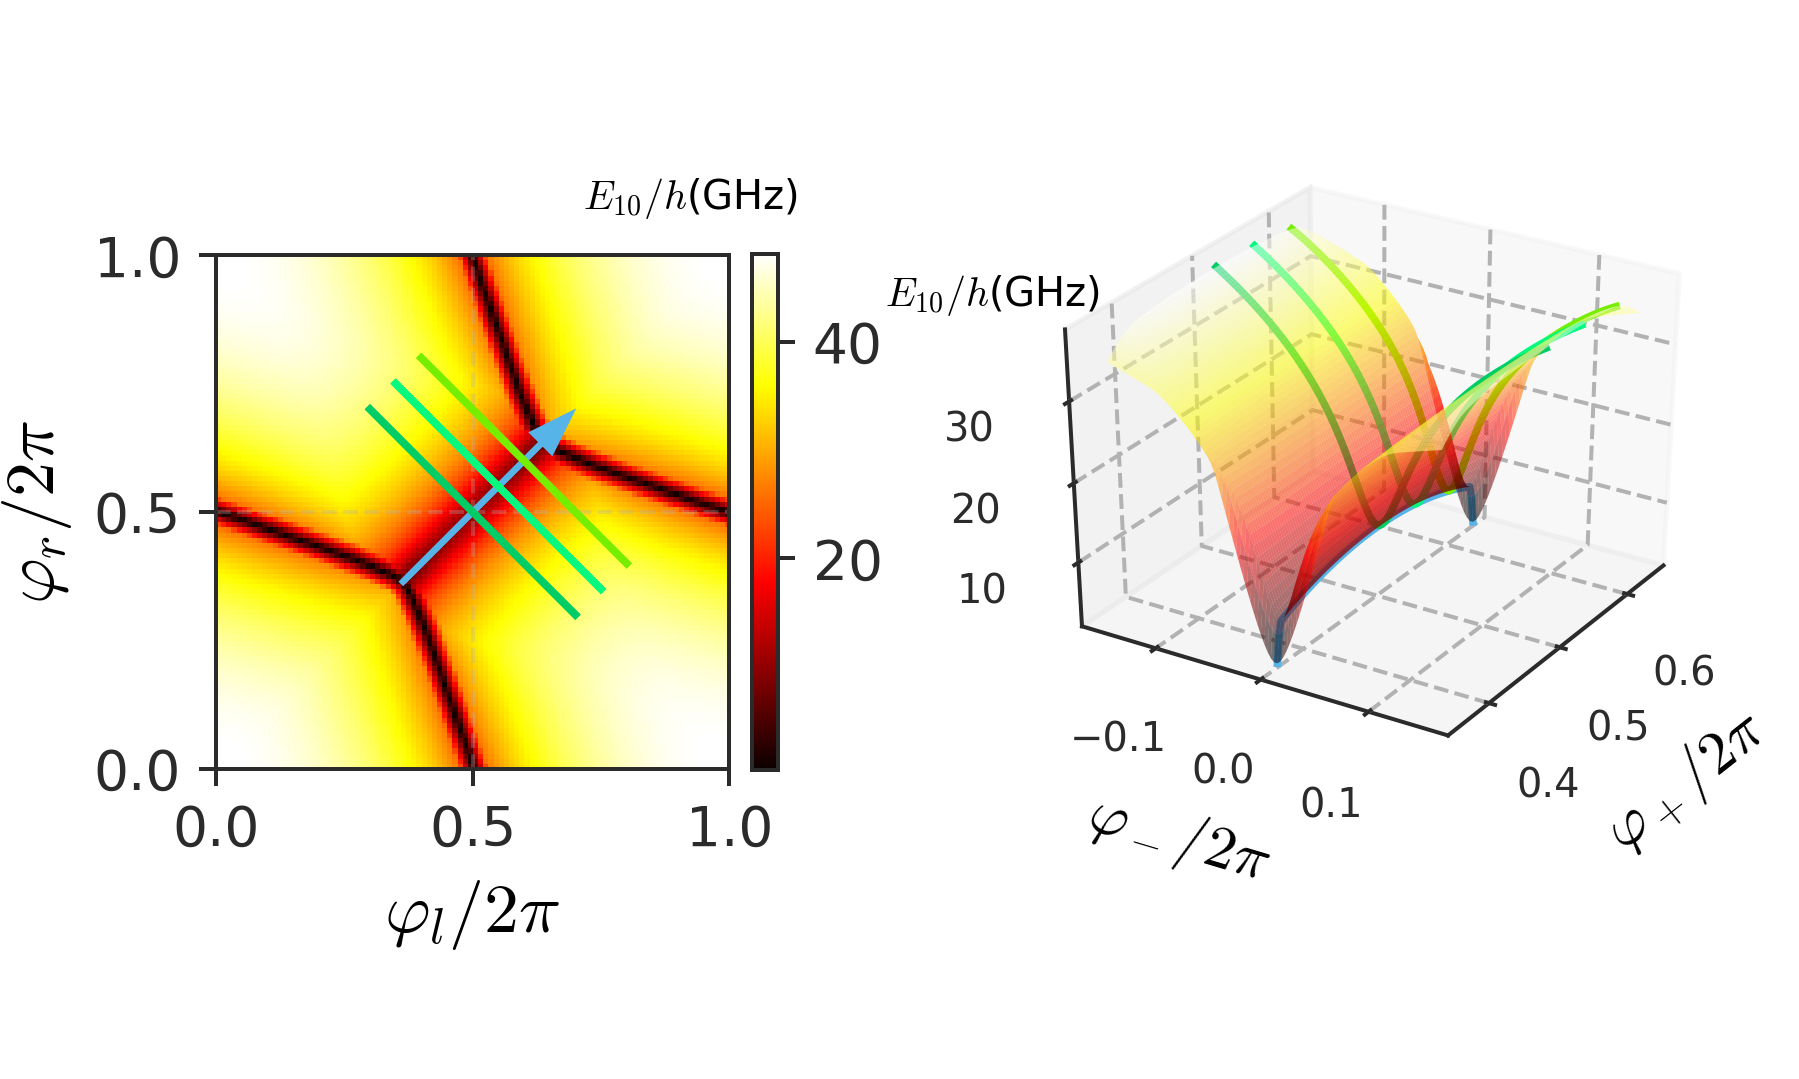

In [166]:
transition_01_phiplus_phiminus = (
    simulation_dictionary_phiplus_phiminus["eigvals"][:,:,1] - 
    simulation_dictionary_phiplus_phiminus["eigvals"][:, :, 0]
)
transition_01_in_phil_phir = (
    simulation_dictionary_phil_phir["eigvals"][:,:,1] -
    simulation_dictionary_phil_phir["eigvals"][:,:,0]
)

fig = plt.figure(figsize=(5, 3))
plt.subplots_adjust(left=0.12, bottom=None, right=0.9,
                     top=None, wspace=0.5, hspace=1)

ax_2d = fig.add_subplot(1, 2, 1)
im = ax_2d.imshow(
    transition_01_in_phil_phir,
    extent=[LOWER, UPPER, LOWER, UPPER],
    origin='lower',
    cmap=cm.hot,
)
# Annotation
cb = fig.colorbar(im, ax=ax_2d, fraction=0.046, pad=0.04)
cb.ax.set_ylabel(r"$E_{10}/h$(GHz)", fontsize=8,
                 rotation=0, ha="left", labelpad=-60, y=1.15)
ax_2d.set_xticks([0, 0.5, 1])
ax_2d.set_yticks([0, 0.5, 1])
ax_2d.set_xlabel(r"$\varphi_l/2\pi$", fontsize=14)
ax_2d.set_ylabel(r"$\varphi_r/2\pi$", fontsize=14)

(x0, y0, width, height) = ax_2d.get_position().bounds
(w_pad, h_pad, wspace, hspace) = fig.get_constrained_layout_pads()

ax_3d = fig.add_axes([x0 + width + 7 * hspace, y0, width * 1.5, height * 1.2], projection='3d')
grid_x, grid_y = np.meshgrid(phi_plus_list, phi_minus_list)
surf = ax_3d.plot_surface(grid_x / (2*pi), grid_y / (2 * pi),
                          transition_01_phiplus_phiminus,
                          cmap=cm.hot,
                          ccount=100,
                          rcount=100,
                          alpha=0.55,
                          linewidth=0, antialiased=True, edgecolor='red'
                          )

# Annotation
ax_3d.view_init(elev=32, azim=32)
ax_3d.set_ylabel(r"$\varphi_-/2\pi$", fontsize=12)
ax_3d.set_xlabel(r"$\varphi_+/2\pi$", fontsize=12)
ax_3d.set_yticks([-0.1, 0, 0.1])
ax_3d.set_xticks([0.4, 0.5, 0.6])
ax_3d.set_zticks([0, 10, 20, 30])
ax_3d.tick_params(axis='both', which='major', labelsize=8)
ax_3d.zaxis.set_rotate_label(False)
#ax_3d.set_zlabel(r"$E_{10}/h$(GHz)", fontsize=10, rotation=0, labelpad=-10, x=10500)
ax_3d.text(x0, y0 - width * 1.5, 55, r"$E_{10}/h$(GHz)", color='black',fontsize=8)

ax_3d.invert_xaxis()

#### Supplementary lines on 2D plot

In [167]:
def evaluate_endpoints_for_2d_phi_plus_slice(phi_plus_slice: float, length: float) -> Dict:
    """Return a dictionary of the coodinates for a alice in phi_plus"""
    coordinates = {
        "x0": phi_plus_slice - length,
        "x1": phi_plus_slice + length,
        "dx": length,
        "dy": - length
    }
    coordinates["y0"] = phi_plus_slice * 2 - coordinates["x0"]
    coordinates["y1"] = phi_plus_slice * 2 - coordinates["x1"]
    
    return coordinates

In [171]:
phiT0 = 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA) / (2 * pi)
phiT1 = (2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)) / (2 * pi)
ax_2d.arrow(phiT0, phiT0,
            phiT1-phiT0, phiT1-phiT0,
            color='C2', head_width=0.05, head_starts_at_zero=False, linewidth=1.2)

curve2_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.6, 0.2)
ax_2d.plot([curve2_coords["x0"], curve2_coords["x1"]],
           [curve2_coords["y0"], curve2_coords["y1"]],
           color='#76ee00', linewidth=1.5
          )
curve3_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.55, 0.2)
ax_2d.plot([curve3_coords["x0"], curve3_coords["x1"]],
           [curve3_coords["y0"], curve3_coords["y1"]],
           color='#04f97f', linewidth=1.5
)
curve4_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.5, 0.2)
ax_2d.plot([curve4_coords["x0"], curve4_coords["x1"]],
           [curve4_coords["y0"], curve4_coords["y1"]],
          color='#00cd66', linewidth=1.5
          )

#### Supplementary lines on 3D plot

In [169]:
def build_curve_for_phi_plus_value(phi_plus_list: List[float],
                                   phi_minus_list: List[float],
                                   phi_plus_value: float,
                                   evaluated_potential_grid) -> Tuple:
    """Take the phi_plus_value and extract from the evaluated_potential_grid to build a cross-section cut"""
    idx = next(idx for (idx, val) in enumerate(
        phi_plus_list) if val > phi_plus_value)
    return (
        phi_minus_list / (2 * pi),
        [phi_plus_list[idx] / (2 * pi)] * len(phi_plus_list),
        evaluated_potential_grid[:, idx]
    )

def build_curve_for_phi_minus_value(phi_plus_list: List[float],
                                    phi_minus_list: List[float],
                                    phi_minus_value: float,
                                    evaluated_potential_grid) -> Tuple:
    """Take the phi_minus_value and extract from the evaluated_potential_grid to build a cross-section cut"""
    idx = next(idx for (idx, val) in enumerate(
        phi_minus_list) if val > phi_minus_value)
    return (
        [phi_minus_list[idx] / (2 * pi)] * len(phi_minus_list),
        phi_plus_list / (2 * pi),
        evaluated_potential_grid[idx, :]
    )

In [170]:
curves = {
    "curve1": build_curve_for_phi_minus_value(phi_plus_list,
                                             phi_minus_list,
                                             0,
                                             transition_01_phiplus_phiminus),
    "curve2": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.6 * (2*pi),
                                             transition_01_phiplus_phiminus),
    "curve3": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.55 * (2*pi),
                                             transition_01_phiplus_phiminus),
    "curve4": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.5 * (2*pi),
                                             transition_01_phiplus_phiminus)
}

ax_3d.plot3D(curves["curve1"][1], curves["curve1"][0], curves["curve1"][2],  # c=zdata, cmap='Greens'
             color='C2', linewidth=1.5)
ax_3d.plot3D(curves["curve2"][1], curves["curve2"][0], curves["curve2"][2],  # c=zdata, cmap='Greens'
             color='#76ee00', linewidth=1.5)
ax_3d.plot3D(curves["curve3"][1], curves["curve3"][0], curves["curve3"][2],  # c=zdata, cmap='Greens'
              color='#04f97f', linewidth=1.5)
ax_3d.plot3D(curves["curve4"][1], curves["curve4"][0], curves["curve4"][2],  # c=zdata, cmap='Greens'
             color='#00cd66', linewidth=1.5)

### Save

In [172]:
plotter.save_onto_white_background(ax, "./output/transition_01", "svg")

### Cross section plots

<IPython.core.display.Javascript object>


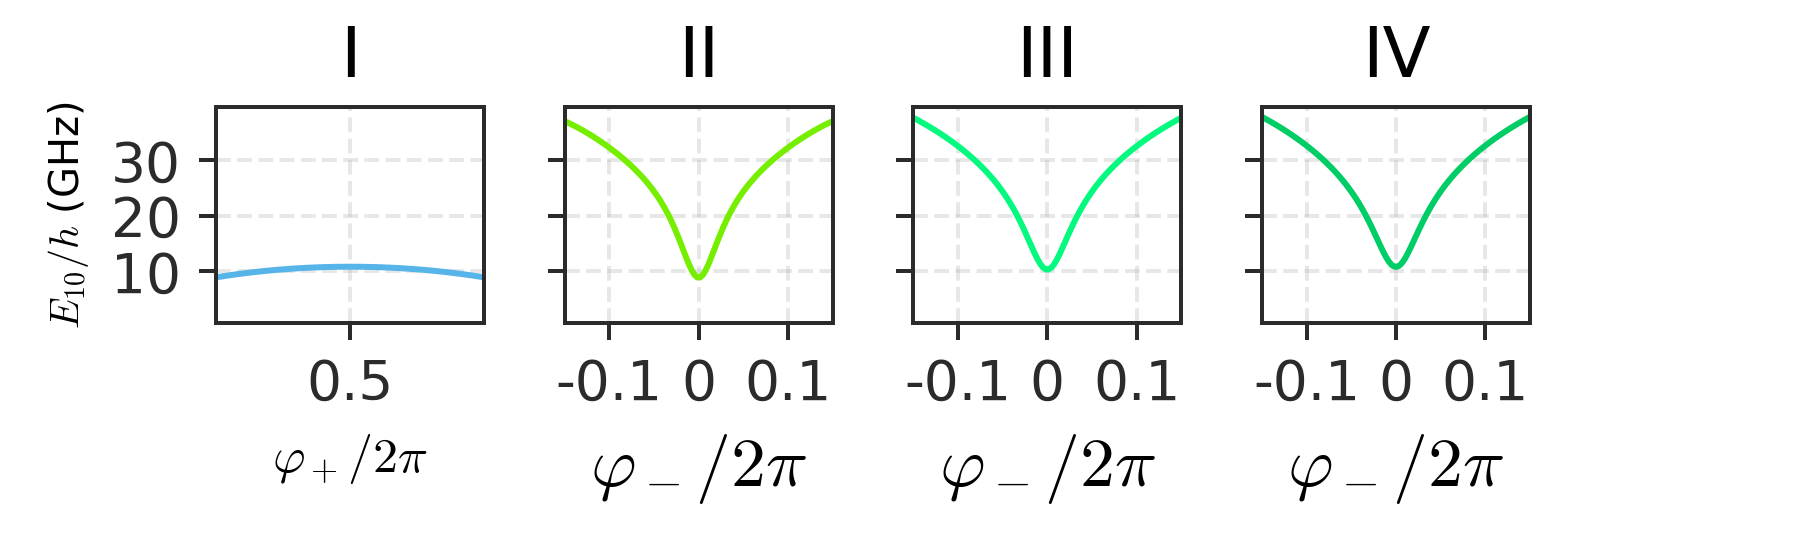

In [162]:
fig, ax = plt.subplots(1, 4, sharex=False, sharey=True, figsize=(5, 1.5))
plt.subplots_adjust(left=0.12, bottom=0.4, right=0.85,
                    top=0.8, wspace=None, hspace=None)

ax[0].plot(curves["curve1"][1], curves["curve1"][2], color="C2")
ax[0].set_title("I", fontsize=14)
ax[1].plot(curves["curve2"][0], curves["curve2"][2], color="#76ee00")
ax[1].set_title("II", fontsize=14)
ax[2].plot(curves["curve3"][0], curves["curve3"][2], color="#04f97f")
ax[2].set_title("III", fontsize=14)
ax[3].plot(curves["curve4"][0], curves["curve4"][2], color="#00cd66")
ax[3].set_title("IV", fontsize=14)

ax[0].set_xticks([-0.5, 0, 0.5, 1, 1.5])
ax[0].set_xlabel(r"$\varphi_+/2\pi$", fontsize=10)
ax[0].set_ylabel(r"$E_{10}/h$ (GHz)", fontsize=8, rotation=90)
ax[0].set_xlim([0.4,0.6])
for i in range(1, 4):
    ax[i].set_xlabel(r"$\varphi_-/2\pi$", fontsize=14)
    ax[i].set_xlim([-0.15, 0.15])
    ax[i].set_xticks([-0.1, 0, 0.1])
    ax[i].set_xticklabels([-0.1, 0, 0.1])

## Transition matrix elements

### Across $\varphi_-$

In [6]:
phi_minus_list = np.linspace(
    - 0.15 * (2 * pi),
    #2 * pi * (LOWER - MIDPOINT) / 2,
    0.15 * (2 * pi),
    #2 * pi * (UPPER - MIDPOINT) / 2, 
    100)
phi_plus_list = np.linspace(pi, pi, 1)

simulation_dictionary_for_transition_matrix = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_minus_list, phi_plus_list, 4, phil_phir_coordinates_supplied=True,
    use_sparse_matrix=False
)

twin_qubit_hamiltonian_manager:190:stage2_prepare_constant_hamiltonian
⮑  🏗 Scaling constant parts of Hamiltonian with
EC:       13.5
EJ:       91
alpha:    1

twin_qubit_hamiltonian_manager:235:stage2_prepare_constant_hamiltonian
⮑  🏗 Constructed matrix 'hamiltonian_constant' with
elements: 2107 (rest will be evaluated during stage3)
rows:     3115
cols:     3115


twin_qubit_simulator_phil_phir:78:simulate
⮑  💻 Running simulation

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:04
twin_qubit_simulator_phil_phir:135:simulate
⮑  💻 Simulation completed



<IPython.core.display.Javascript object>


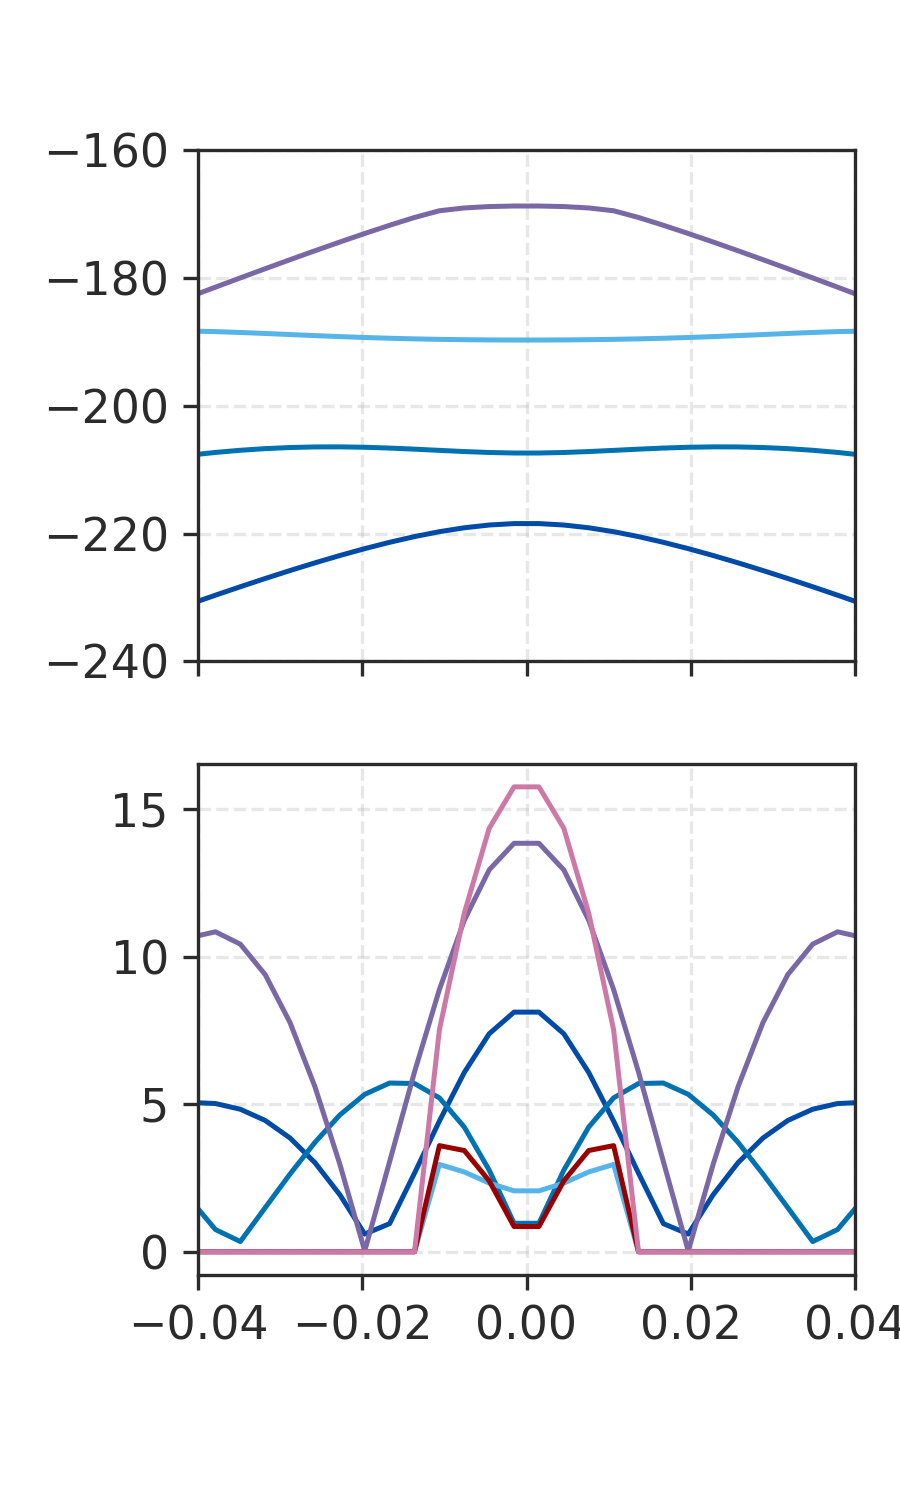

/home/antonov/.config/python_vi/cuda-vi/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/antonov/.config/python_vi/cuda-vi/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/antonov/.config/python_vi/cuda-vi/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/antonov/.config/python_vi/cuda-vi/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [7]:
# phiplus_index_at_pi = index_of_first_element_greater_than_value(phi_plus_list, pi)
phiplus_index_at_pi = 0

fig = plt.figure(figsize=(3, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(left=0.22, bottom=None, right=None,
                    top=None, wspace=None, hspace=None)

ax[0].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["eigvals"][:, phiplus_index_at_pi,0])
ax[0].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["eigvals"][:, phiplus_index_at_pi,1])
ax[0].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["eigvals"][:, phiplus_index_at_pi,2])
ax[0].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["eigvals"][:, phiplus_index_at_pi,3])

ax[1].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d0-1"][:, phiplus_index_at_pi])
ax[1].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d0-2"][:, phiplus_index_at_pi])
ax[1].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d0-3"][:, phiplus_index_at_pi])
ax[1].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d1-2"][:, phiplus_index_at_pi])
ax[1].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d1-3"][:, phiplus_index_at_pi])
ax[1].plot(phi_minus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d2-3"][:, phiplus_index_at_pi])


# ax[0].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix["eigvals"][:, phiplus_index_at_pi,0])

# ax[0].plot(twin_qubit.flux_list,simulation_dictionary_for_transition_matrix["2-3"], color="C4")
# ax[0].set_ylabel("$\omega/2\pi$ (GHz)")
# ax[0].set_ylim([3, 18])
# ax[0].set_yticks([3, 5, 10, 15, 18])

# ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]) * 10**6, color='C4')
# ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]) * 10**6, color="C0")
# ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]) * 10**6, color="C6")
# ax[1].set_xlabel("Normalised Magnetic Flux ($\Phi/\Phi_0$)")
# ax[1].set_ylabel(r"Matrix elements ($\mu$V)")
ax[1].set_xlim([-0.04, 0.04])
ax[0].set_ylim([-240, -160])

# plt.tight_layout()
plt.show()

### Across $\varphi_+$

In [6]:
phi_degeneracy = (
    2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA),
    2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)
)
phi_minus_list = np.linspace(0, 0, 1)
phi_plus_list = np.linspace(
#     phi_degeneracy[0], phi_degeneracy[1], 
    0.37 * (2 * pi), 0.63 * (2 * pi),
    51)

simulation_dictionary_for_transition_matrix = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_minus_list, phi_plus_list, 5, phil_phir_coordinates_supplied=True,
    use_sparse_matrix=False
)

twin_qubit_hamiltonian_manager:190:stage2_prepare_constant_hamiltonian
⮑  🏗 Scaling constant parts of Hamiltonian with
EC:       13.5
EJ:       91
alpha:    1

twin_qubit_hamiltonian_manager:235:stage2_prepare_constant_hamiltonian
⮑  🏗 Constructed matrix 'hamiltonian_constant' with
elements: 4617 (rest will be evaluated during stage3)
rows:     6921
cols:     6921


twin_qubit_simulator_phil_phir:76:simulate
⮑  💻 Running simulation

/home/antonov/dipole/qubit-simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvals"][phi_l_idx][phi_r_idx] = eigvals
/home/antonov/dipole/qubit-simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvals"][phi_l_idx][phi_r_idx] = eigvals
0% [█                             ] 100% | ETA: 00:01:06/home/anton

0% [████████████████              ] 100% | ETA: 00:00:30/home/antonov/dipole/qubit-simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvals"][phi_l_idx][phi_r_idx] = eigvals
0% [█████████████████             ] 100% | ETA: 00:00:29/home/antonov/dipole/qubit-simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvals"][phi_l_idx][phi_r_idx] = eigvals
/home/antonov/dipole/qubit-simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_phil_phir.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  simulation_dictionary["eigvals"][phi_l_idx][phi_r_idx] = eigvals
0% [██████████████████            ] 100% | ETA: 00:00:26/home/antonov/dipole/qubit-simulations/qubit/twin_qubit/simulation/twin_qubit_simulator_

<IPython.core.display.Javascript object>


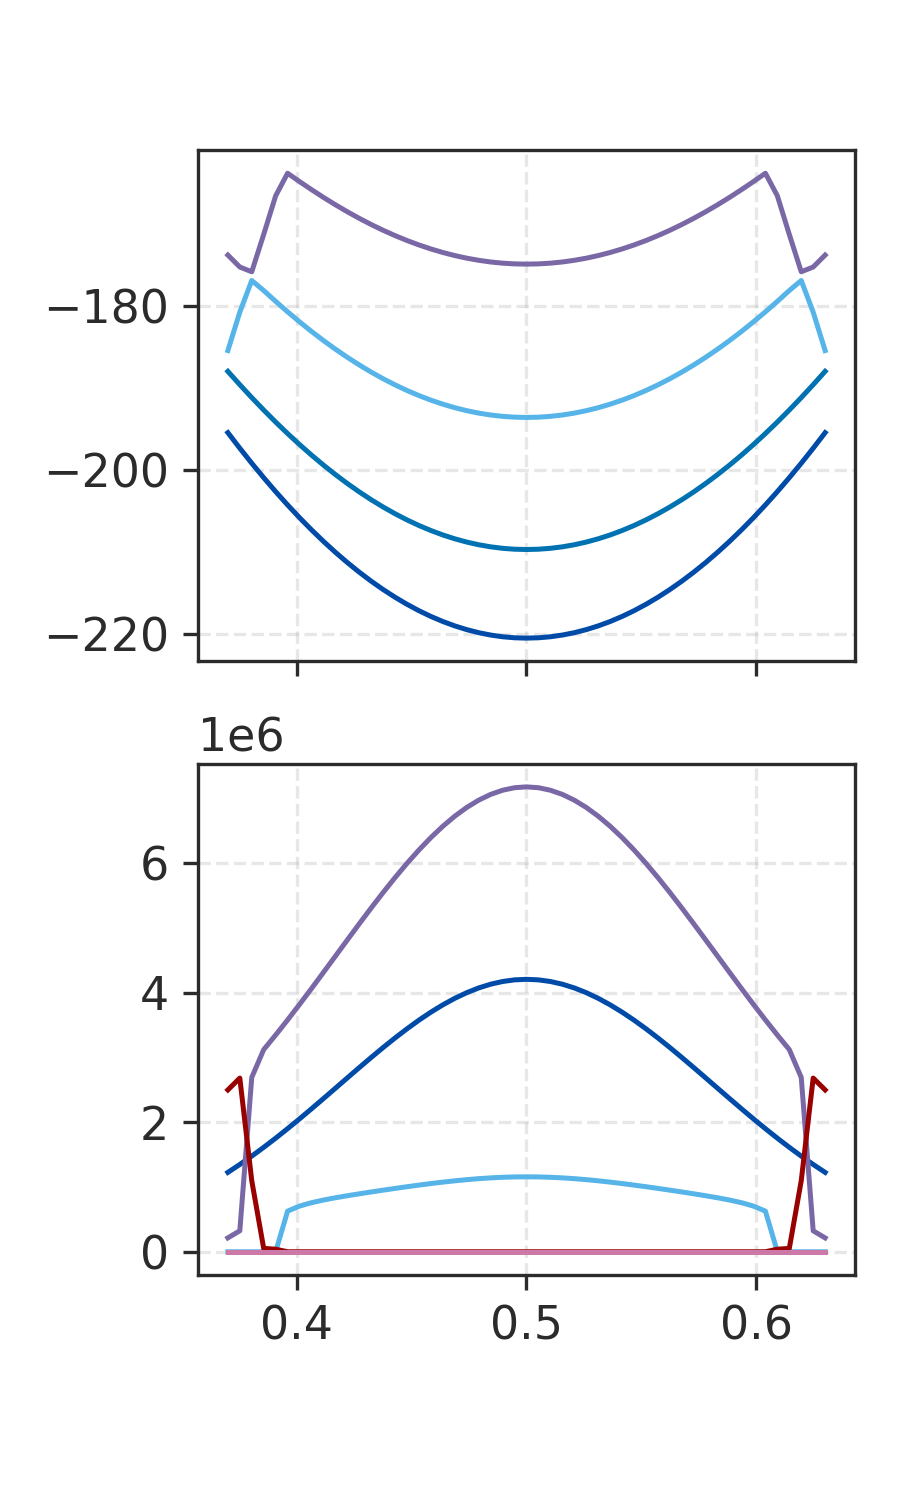

In [7]:
# phiminus_index_at_zero = index_of_first_element_greater_than_value(phi_minus_list, 0)
phiminus_index_at_zero= 0

fig = plt.figure(figsize=(3, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(left=0.22, bottom=None, right=None,
                    top=None, wspace=None, hspace=None)

for i in [
    0, 1, 2, 3
]:
    ax[0].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix["eigvals"][phiminus_index_at_zero, :,i])

for i in [
    "d0-1",
    "d0-2", 
    "d0-3", 
    "d1-2", 
    "d1-3", 
    "d-23"
]:
    ax[1].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix[i][phiminus_index_at_zero] * 10 ** 6)

# ax[1].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d0-2"][phiminus_index_at_zero])
# ax[1].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d0-3"][phiminus_index_at_zero])
# ax[1].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d1-2"][phiminus_index_at_zero])
# ax[1].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d1-3"][:, phiminus_index_at_zero])
# ax[1].plot(phi_plus_list / (2 * pi), simulation_dictionary_for_transition_matrix["d2-3"][:, phiminus_index_at_zero])

# Local Fluctuations
> Run simulation of energies E_01 when between loop1 and loop 2:
> - Random flux noise
> - Anticorrelated flux noise
>
> And then plot this on histogram

In [6]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ilya_plot")

from quantum_builder import QuantumBuilder

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 2,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(0.3, 0.7, 500)
EC = 13.5
EJ = 91
twin_qubit_fluctuation = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARNING
)
twin_qubit_fluctuation.override_parameters(EC=EC, EJ=EJ)

In [7]:
MU = 0.5
SIGMA = 0.01
NUMBER_OF_SIMULATIONS = 10000

twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, 3, condition="ABSENT")
default_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="ANTICORRELATED")
correlated_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="RANDOM")
random_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]

twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        3
condition:                    ABSENT
Example pairs:                (0.5, 0.5)
                              (0.5, 0.5)


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        10000
condition:                    ANTICORRELATED
Example pairs:                (0.5114790247473144, 0.48852097525268556)
                              (0.5020165181867859, 0.49798348181321406)


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:25
twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                      

## $\sigma=0.01$

In [20]:
normalised_random_energies = np.array(random_energies) / np.sum(random_energies)
normalised_correlated_energies = np.array(correlated_energies) / np.sum(correlated_energies)

<IPython.core.display.Javascript object>


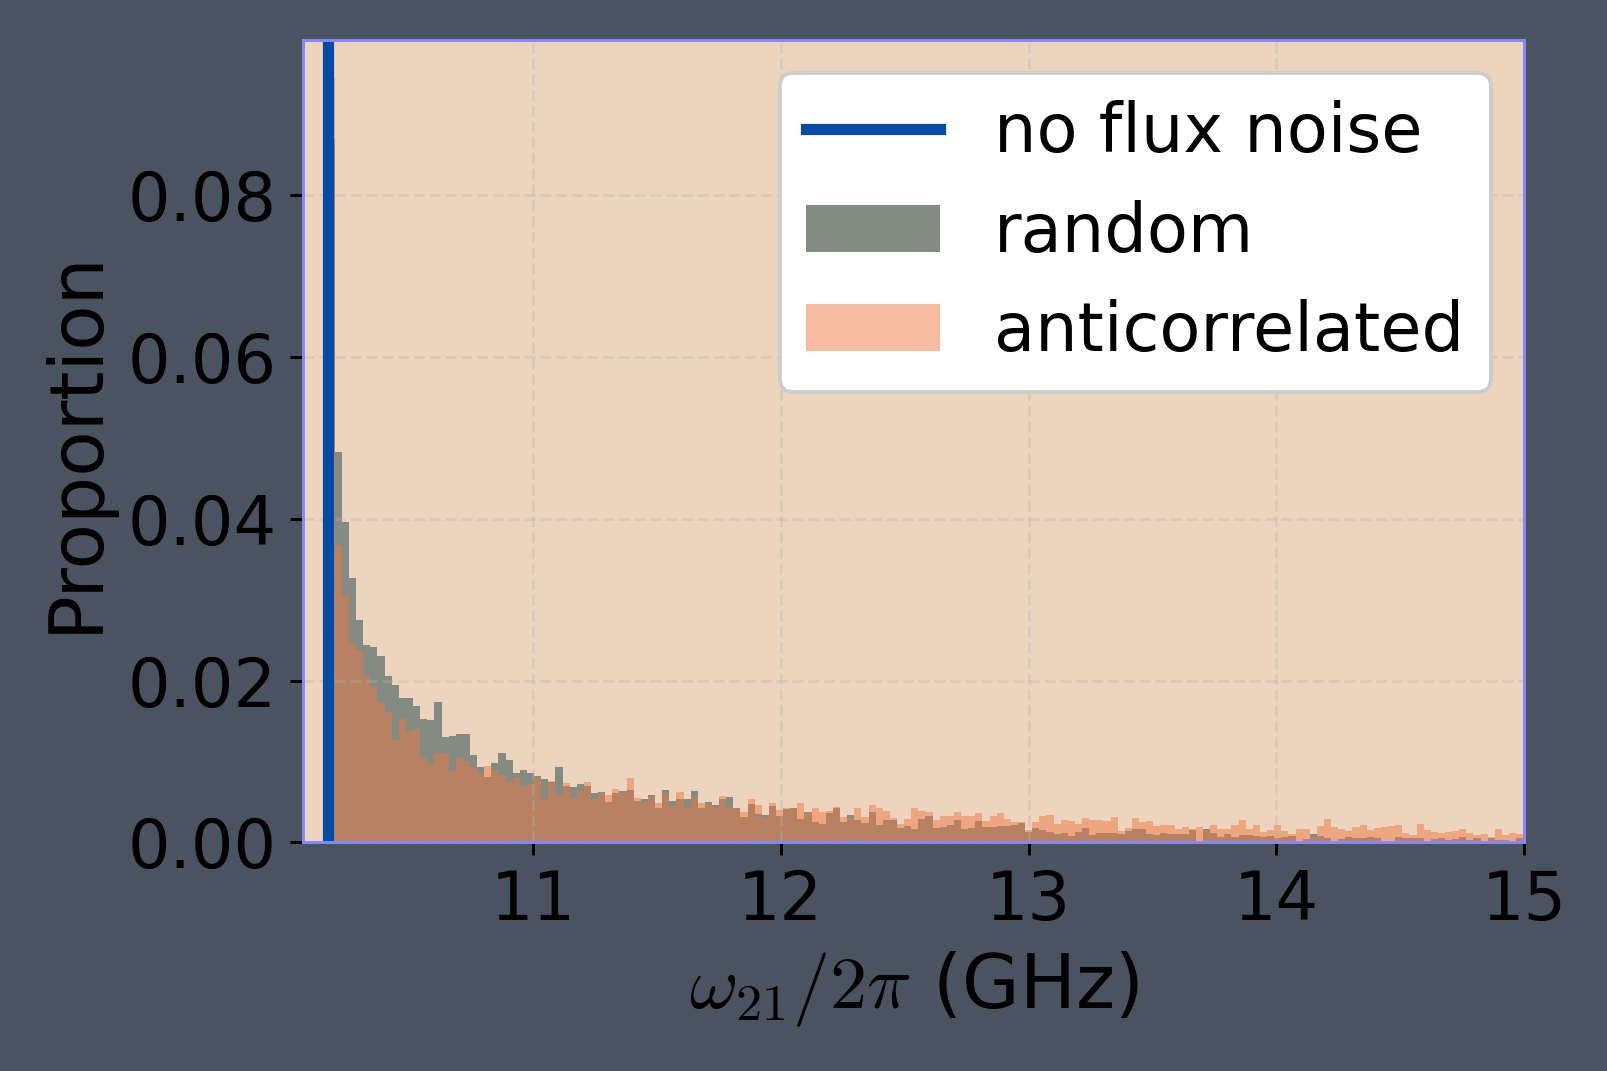

In [26]:
from matplotlib.ticker import PercentFormatter

default_energy = default_energies[0]
BIN_NUMBER = 500
MIN_RANGE = default_energy
MAX_RANGE = max([max(correlated_energies), max(random_energies)])
bins = np.linspace(MIN_RANGE, MAX_RANGE, BIN_NUMBER)

fig_fluc = plt.figure(figsize=(6, 4))
ax_fluc = fig_fluc.subplots(nrows=1, ncols=1)

ax_fluc.hist(random_energies, bins=bins, weights=np.ones(len(random_energies)) / len(random_energies),
             color="#838b83", alpha = 1, label="random")
ax_fluc.hist(correlated_energies, bins=bins, weights=np.ones(len(random_energies)) / len(random_energies),
             color="#ee7942", alpha = 0.5, label="anticorrelated")
ax_fluc.axvline(x=default_energy, linewidth=3.0, label="no flux noise")

ax_fluc.set_xlabel("$\omega_{21}/2\pi$ (GHz)")
ax_fluc.set_ylabel("Proportion")
ax_fluc.tick_params(labelsize=18)
ax_fluc.tick_params(labelsize=18)
ax_fluc.set_xlim([default_energy/1.01, 15])
ax_fluc.legend(fontsize=18, facecolor='white', framealpha=1)

plt.tight_layout()
plt.show()

In [27]:
plt.savefig(f"./output/local_fluctuations.svg", transparent=True)

## $\sigma=0.001$

<IPython.core.display.Javascript object>


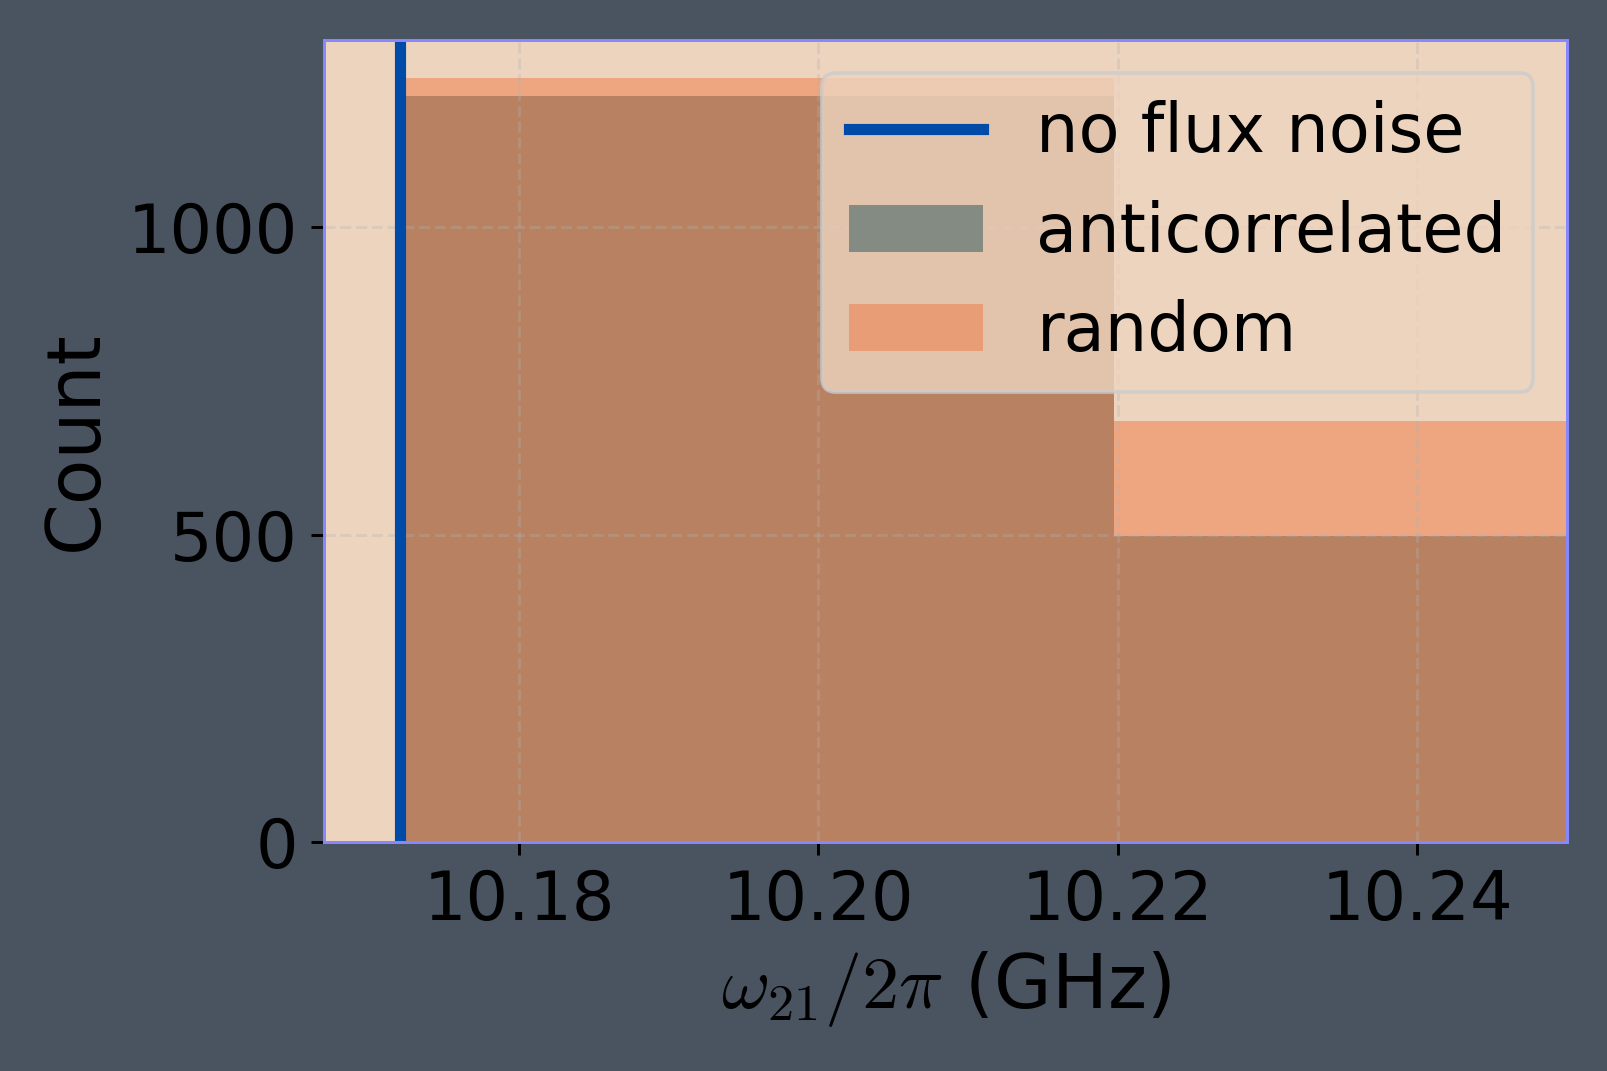

In [110]:
default_energy = default_energies[0]
BIN_NUMBER = 250
MIN_RANGE = default_energy
MAX_RANGE = max([max(correlated_energies), max(random_energies)])
bins = np.linspace(MIN_RANGE, MAX_RANGE, BIN_NUMBER)

fig_fluc = plt.figure(figsize=(6, 4))
ax_fluc = fig_fluc.subplots(nrows=1, ncols=1)

(count_correlated, bins_correlated, _) = ax_fluc.hist(correlated_energies, bins=bins, color="#838b83", alpha = 1.0, label="anticorrelated")
(count_random, bins_random, _) = ax_fluc.hist(random_energies, bins=bins, color="#ee7942", alpha = 0.5, label="random")
ax_fluc.axvline(x=default_energy, linewidth=3.0, label="no flux noise")

ax_fluc.set_xlabel("$\omega_{21}/2\pi$ (GHz)")
ax_fluc.set_ylabel("Count")
ax_fluc.tick_params(labelsize=18)
ax_fluc.tick_params(labelsize=18)
ax_fluc.set_xlim([default_energy/1.0005, 10.25])
ax_fluc.legend(fontsize=18)

plt.tight_layout()
plt.show()

In [112]:
plt.savefig(f"./output/local_fluctuations.svg", transparent=True)